In [30]:
from datasets import KITTIRAWDataset
import os
import matplotlib.pyplot as plt
import torch
import numpy as np

In [3]:
def readlines(path):
    with open(path, 'r') as f:
        return f.read().splitlines()

In [4]:
dataset = KITTIRAWDataset(
    attention_mask_loss=False, 
    edge_loss=True, 
    data_path='mini_kitti/kitti', 
    attention_path='mini_kitti/attention', 
    attention_threshold=0.7,
    filenames=readlines(os.path.join('splits', 'short', 'train_files.txt')),
    height=192,
    width=640,
    frame_idxs=[0, -1, 1],
    num_scales=4,
    img_ext='.png'
)

In [79]:
sample = dataset[0]
attention_masks = sample['attention']

attention_masks[attention_masks >= 0.75] = 1
attention_masks[attention_masks < 0.75] = 0

In [80]:
def get_attention_mask_per_pixel_in_matrix(attention_masks):
    M = torch.zeros(attention_masks.shape[1:])
    for row_idx in range(M.shape[0]):
        for col_idx in range(M.shape[1]):
            attention_values = attention_masks[:, row_idx, col_idx]
            
            active_masks = (attention_values != 0).nonzero().reshape(-1)
            if active_masks.shape[0] > 0:
                active_mask = np.random.choice(active_masks.numpy())
            else:
                active_mask = -1
            M[row_idx, col_idx] = active_mask
    return M

In [81]:
M = get_attention_mask_per_pixel_in_matrix(sample['attention'])

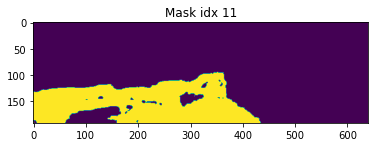

In [92]:
mask_idx = int(M[190, 300].item())
plt.imshow(attention_masks[mask_idx].numpy())
plt.title('Mask idx %i'% mask_idx)
plt.show()

In [ ]:
print(attention_masks[])

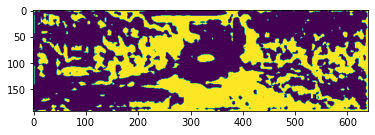

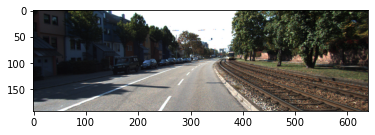

tensor(0.)


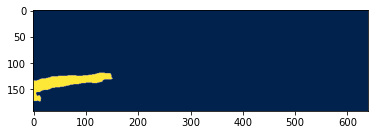

tensor(0.)


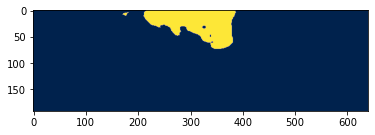

tensor(0.)


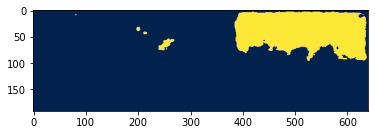

tensor(0.)


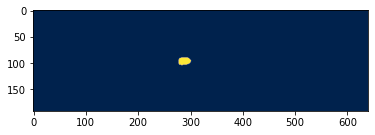

tensor(0.)


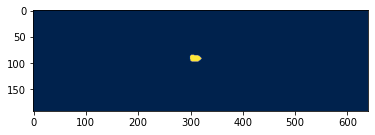

tensor(0.)


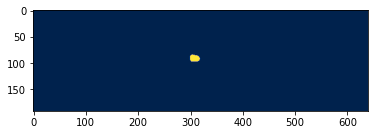

tensor(0.)


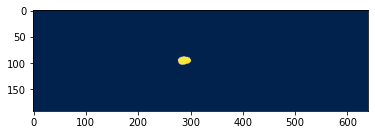

tensor(0.)


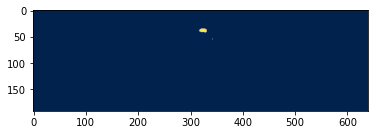

tensor(0.)


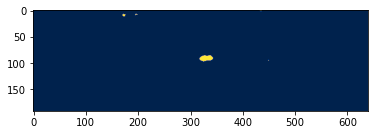

tensor(0.)


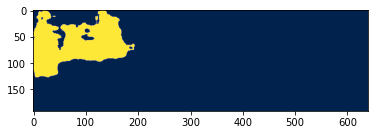

tensor(0.)


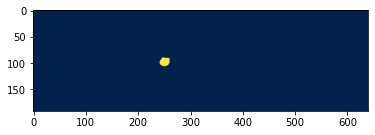

tensor(0.)


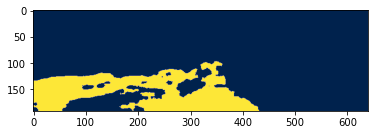

tensor(0.)


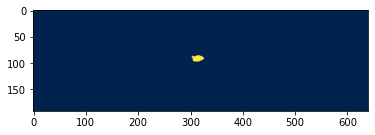

tensor(0.)


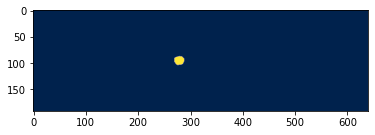

tensor(0.)


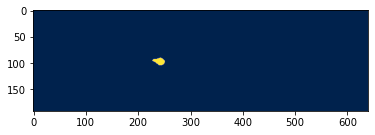

tensor(0.)


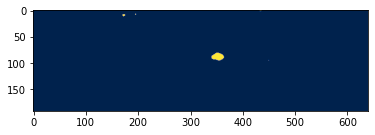

tensor(0.)


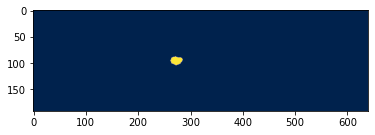

tensor(0.)


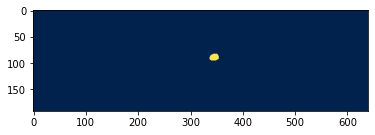

tensor(0.)


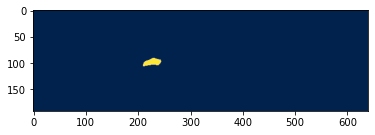

tensor(0.)


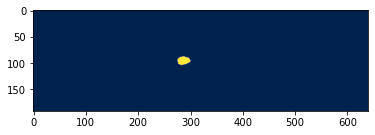

tensor(0.)


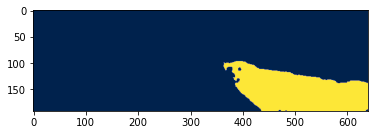

tensor(0.)


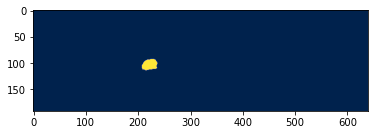

tensor(0.)


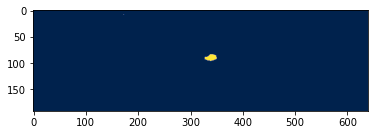

tensor(0.)


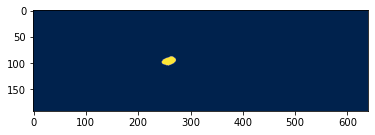

tensor(0.)


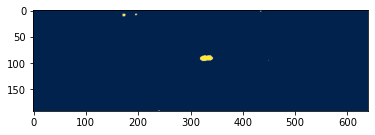

tensor(0.)


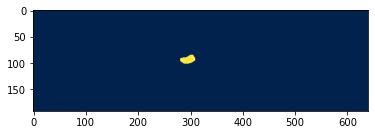

tensor(0.)


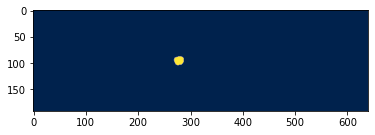

tensor(0.)


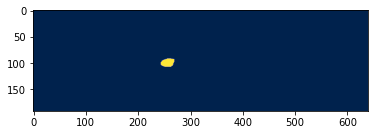

tensor(0.)


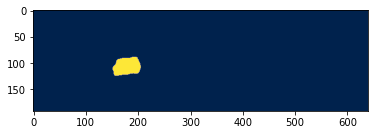

tensor(0.)


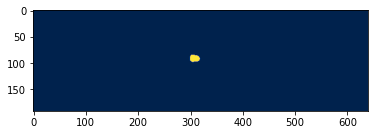

In [13]:
plt.imshow(sample[('color_aug', 0, 0)].permute(1, 2, 0))
plt.show()

for attention_mask in sample['attention']:
    print(attention_mask[0, 0])
    plt.imshow(attention_mask, cmap='cividis')
    plt.show()